In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
blood_transfusion_service_center = fetch_ucirepo(id=176)

# data (as pandas dataframes)
X = blood_transfusion_service_center.data.features
y = blood_transfusion_service_center.data.targets

# metadata
print(blood_transfusion_service_center.metadata)

# variable information
print(blood_transfusion_service_center.variables)


{'uci_id': 176, 'name': 'Blood Transfusion Service Center', 'repository_url': 'https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center', 'data_url': 'https://archive.ics.uci.edu/static/public/176/data.csv', 'abstract': 'Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem. ', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 748, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Donated_Blood'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C5GS39', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Knowledge discovery on RFM model using Bernoulli sequence', 'authors': 'I. Yeh, K. Yang, Tao-Ming Ting', 'published_in': 'Expert systems with applications', 'year': 2009, 'url': 'https://www.semantics

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
bldtr_dtst = blood_transfusion_service_center.data.original
bldtr_dtst.head()

,Recency,Frequency,Monetary,Time,Donated_Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [6]:
bldtr_dtst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Recency        748 non-null    int64
 1   Frequency      748 non-null    int64
 2   Monetary       748 non-null    int64
 3   Time           748 non-null    int64
 4   Donated_Blood  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [7]:
bldtr_dtst.shape

(748, 5)

In [8]:
bldtr_dtst.describe()

,Recency,Frequency,Monetary,Time,Donated_Blood
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [10]:
bldtr_dup = bldtr_dtst.copy()
bldtr_dup.info()
bldtr_dup.head()
bldtr_dup.shape
bldtr_dup.describe()

print("\nPercentage of Null Values:")
round(100*(bldtr_dup.isnull().sum()/len(bldtr_dup)), 2).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Recency        748 non-null    int64
 1   Frequency      748 non-null    int64
 2   Monetary       748 non-null    int64
 3   Time           748 non-null    int64
 4   Donated_Blood  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB

Percentage of Null Values:


Recency          0.0
Frequency        0.0
Monetary         0.0
Time             0.0
Donated_Blood    0.0
dtype: float64

In [11]:
bldtr_dup.drop_duplicates(subset = None, inplace = True)
print("Dataset shape: ", bldtr_dtst.shape)
print("Dataset shape after dropping duplicates: ", bldtr_dup.shape)

Dataset shape:  (748, 5)
Dataset shape after dropping duplicates:  (533, 5)


In [12]:
bldtr_dup.isnull().sum()

Recency          0
Frequency        0
Monetary         0
Time             0
Donated_Blood    0
dtype: int64

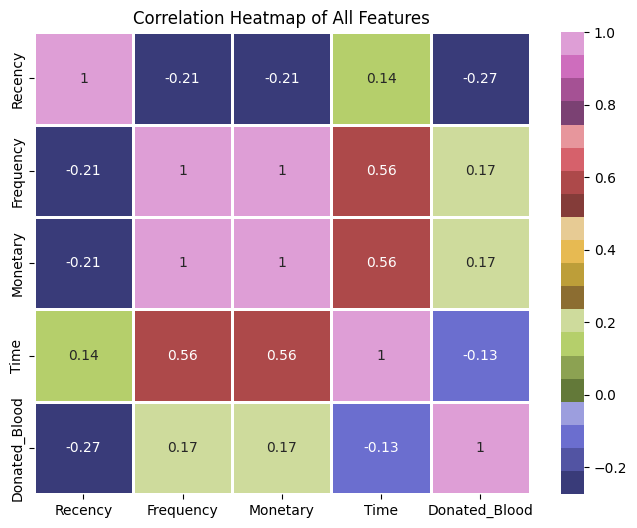

In [13]:
# Calculate correlation matrix for all features
correlation_matrix_all = bldtr_dup.corr()

# Plot correlation heatmap for all features
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_all, annot=True, cmap='tab20b', linewidths=0.8)
plt.title('Correlation Heatmap of All Features')
plt.show()

In [14]:
models_alg = {
    "Logistic Regression": LogisticRegression(max_iter=30000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
}

In [15]:
X = bldtr_dup[['Recency','Frequency','Monetary','Time']]
y = bldtr_dup['Donated_Blood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
acc_result = {}
for name, model in models_alg.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_result[name] = accuracy

visual_output = pd.DataFrame({
    "Model": list(acc_result.keys()),
    "Accuracy": list(acc_result.values()),
    "Feature Selected": ['All Features'] * len(models_alg)
})
print (visual_output)

print("\nAccuracy Scores")
for name, accuracy in acc_result.items():
    print(f"{name}: {accuracy*100:.2f}%")

                 Model  Accuracy Feature Selected
0  Logistic Regression  0.766355     All Features
1                  KNN  0.747664     All Features
2        Random Forest  0.626168     All Features

Accuracy Scores
Logistic Regression: 76.64%
KNN: 74.77%
Random Forest: 62.62%


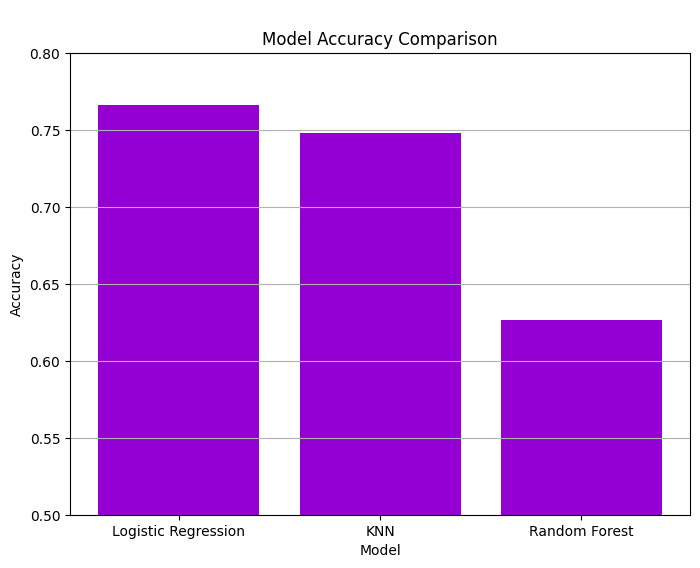

In [19]:
plt.figure(figsize=(8,6))
plt.bar(visual_output['Model'], visual_output['Accuracy'], color='darkviolet')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('\nModel Accuracy Comparison')
plt.ylim(0.50, 0.80)
plt.grid(axis='y')

# Show the plot
plt.show()

In [24]:
for default, clascf in models_alg.items():
    clascf.fit(X_train, y_train)

    y_test_pred = clascf.predict(X_test)

    acc = accuracy_score(y_test, y_test_pred)
    accuracy_prcnt = acc * 100
    print(f"{default} Accuracy: {accuracy_prcnt:.2f}%")

    clscf_rpt = classification_report(y_test, y_test_pred)
    print(f"{default} (Classification Report):\n{clscf_rpt}\n")

Logistic Regression Accuracy: 76.64%
Logistic Regression (Classification Report):
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        80
           1       0.58      0.26      0.36        27

    accuracy                           0.77       107
   macro avg       0.69      0.60      0.61       107
weighted avg       0.74      0.77      0.73       107


KNN Accuracy: 74.77%
KNN (Classification Report):
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        80
           1       0.50      0.37      0.43        27

    accuracy                           0.75       107
   macro avg       0.65      0.62      0.63       107
weighted avg       0.73      0.75      0.73       107


Random Forest Accuracy: 62.62%
Random Forest (Classification Report):
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        80
           1       0.28      0.30

In [22]:
mod_best = max(acc_result, key=acc_result.get)
top_perf = models_alg[mod_best]

top_perf.fit(X_train, y_train)
high_pred = top_perf.predict(X_test)
high_accu = accuracy_score(y_test, high_pred)

ens1_stacking = StackingClassifier(estimators=[('mod_best', top_perf)], final_estimator=LogisticRegression(max_iter=10000))
ens1_stacking.fit(X_train, y_train)
ens1_accu = ens1_stacking.score(X_test, y_test)

ens2_boosting = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
ens2_boosting.fit(X_train, y_train)
ens2_accu = ens2_boosting.score(X_test, y_test)

ens3_bagging = BaggingClassifier(estimator=top_perf, n_estimators=100)
ens3_bagging.fit(X_train, y_train)
ens3_accu = ens3_bagging.score(X_test, y_test)

ensemble_performance = {
    "Original": high_accu,
    "Stacking": ens1_accu,
    "XGBoost": ens2_accu,
    "Bagging": ens3_accu
}
print("Summary of Accuracy with Ensemble Learning Techniques")
for model, accuracy in ensemble_performance.items():
    print(f"{model}: {accuracy:.4f}")

Summary of Accuracy with Ensemble Learning Techniques
Original: 0.7664
Stacking: 0.7477
XGBoost: 0.7009
Bagging: 0.7664


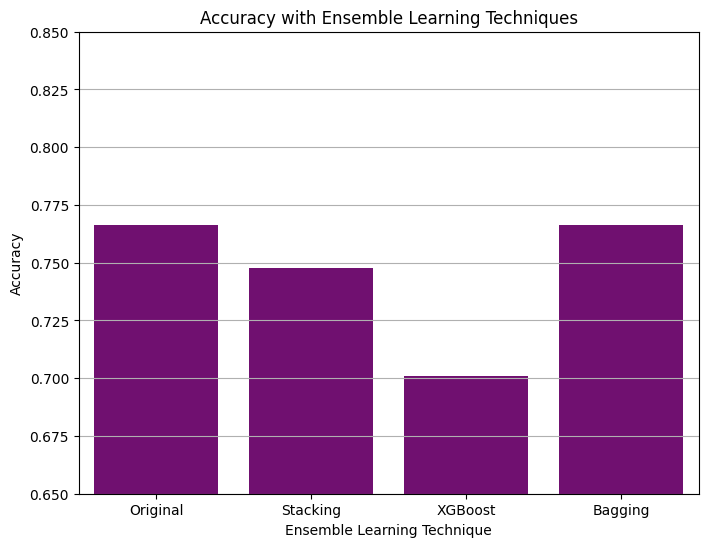

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(ensemble_performance.keys()), y=list(ensemble_performance.values()), color='purple')
plt.xlabel('Ensemble Learning Technique')
plt.ylabel('Accuracy')
plt.title('Accuracy with Ensemble Learning Techniques')
plt.ylim(0.65, 0.85)
plt.grid(axis='y')
plt.show()